Simplyhired.com EDA


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
import re

In [ ]:
df = pd.read_csv('SimplyHiredCleanData.csv')

In [ ]:
df.head()

,title,salary,company,description,location,city,state
0,data analyst,110000.0,cognizant technology solutions,perform data analysis on large volume of healt...,"['detroit', ' mi']",detroit,mi
1,data analyst/statistician,77749.0,us department of veterans affairs,create processes for assessing quality and acc...,"['ann arbor', ' mi']",ann arbor,mi
2,data analyst,110000.0,best egg,"in addition to semi-monthly salary payments, t...",['remote'],remote,NaN
3,data analyst,104000.0,integrityatl,to do well in this role you need a very fine e...,['united states'],united states,NaN
4,program associate i - data analyst,74395.0,dpscd,demonstrated success in analyzing and interpre...,"['detroit', ' mi']",detroit,mi


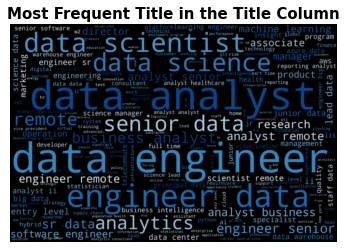

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 2000, colormap="Blues").generate(" ".join(df.title))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('Most Frequent Title in the Title Column', fontsize=15, color ="black", fontweight="bold")
plt.axis('off')
plt.show()

The above figure shows the title of the data jobs. The size of the text represents the frequency obtained in the title. The largest text "data engineer" demonstrates that highest no of jobs has this title.

In [ ]:
df['title'] = df['title'].str.lower()
df.groupby('title').size().sort_values(ascending=False)
df_count = pd.DataFrame(df.groupby('title').size().sort_values(ascending=False).rename('Count').reset_index())
df_count

,title,Count
0,data engineer,342
1,data analyst,236
2,data scientist,79
3,senior data engineer,64
4,business analyst,46
...,...,...
1686,data engineer/senior data engineer,1
1687,data engineer/scientist – development program,1
1688,data engineer/data warehouse developer,1
1689,data engineer/data scientist @ remote work (on...,1


Text(0.5, 1.0, 'Top 10 most popular job title')

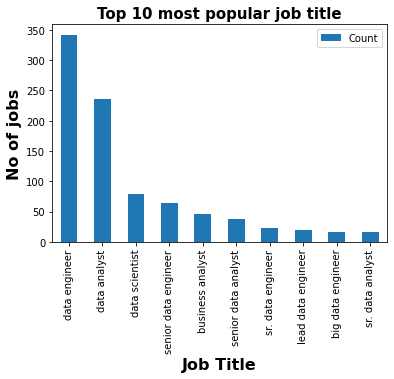

In [ ]:
df_count[:10].plot(x='title',y='Count',kind='bar')
plt.ylabel('No of jobs',fontsize=16,color='black', fontweight="bold")
plt.xlabel('Job Title',fontsize=16,color='black', fontweight="bold")
plt.title('Top 10 most popular job title', fontsize=15, color ="black", fontweight="bold")


The above bar chart shows the frequency of different job title posted on Simplyhired. The job title, Data Engineer is the most popular job.

In [ ]:
#Lets find the salaray range for Data Engineers roles
df.where(df["title"] == "data engineer").salary.mean()

119735.79798431185

In [ ]:
de = df.groupby('company')['title'].count().sort_values(ascending = False).head(10)
pd.DataFrame({'count':de})

,count
company,
indeed,44
amazon.com services llc,33
tiktok,29
microsoft,24
home depot / thd,21
spotify,20
optum,15
unitedhealthcare,14
pcs global tech,14


The above table shows the number of job opening at various companies in the data industry. Let's create a bar chart to compare.

Text(0.5, 1.0, 'Top 10 companies Most Popular Job Title')

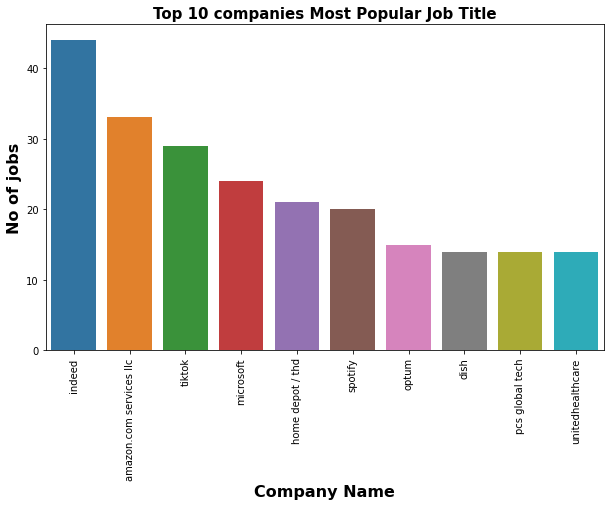

In [ ]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.barplot(data=df.groupby('company').count().nlargest(10, 'title').reset_index(), x ='company', y='title')
a.set_xticklabels(df.groupby('company').count().nlargest(10, 'title').reset_index()['company'],rotation=90)   
a.set_ylabel('No of jobs',fontsize=16,color='black', fontweight="bold")
a.set_xlabel('Company Name',fontsize=16,color='black', fontweight="bold")
plt.title('Jobs Based on State', fontsize=15, color ="black", fontweight="bold")
plt.title('Top 10 companies Most Popular Job Title', fontsize=15, color ="black", fontweight="bold")


It's pretty obvious that the companies that deals with users information offers the most jobs in the data industry. Indeed is constantly collecting and monitoring user information and activity on their website. Amazon collects big data through their AWS service. In order for their business to continue to grow, they will need a lot of data engineers and data scientists to analyst and process the data. 

In [ ]:
job_count = df['state'].value_counts()
job_count

 ca    353
 ny    201
 tx    140
 mi    120
 ma     91
 va     90
 wa     86
 ga     83
 mn     56
 co     55
 il     55
 ne     45
 fl     44
 oh     43
 nj     39
 md     38
 nc     37
 dc     36
 ct     31
 tn     28
 mo     27
 ut     26
 ia     22
 az     18
 or     17
 wi     15
 pa     13
 ky      9
 ks      8
 in      8
 de      7
 al      7
 nh      6
 ok      5
 vt      4
 ms      3
 ri      3
 pr      3
 hi      2
 wv      2
 sc      2
 la      2
 ak      2
 ar      2
 wy      2
 id      2
 nv      2
 nm      2
Name: state, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jobs Based on State')

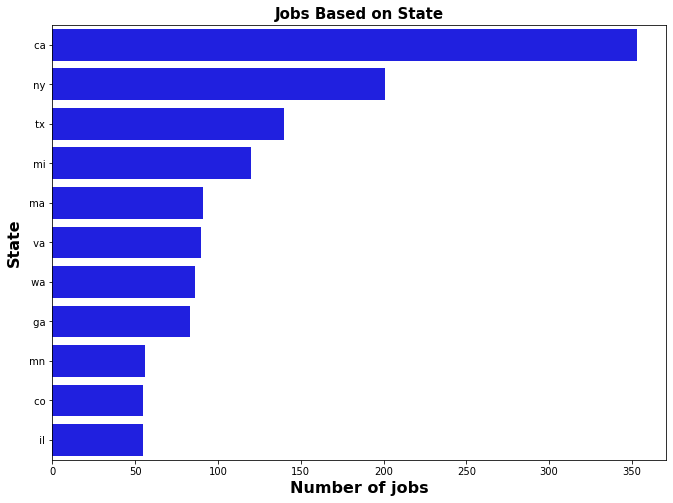

In [ ]:
from matplotlib import pyplot as plt
#
plt.rcParams['figure.figsize'] = 11,8
g2  = sns.barplot(df.state.value_counts().values[:11], df.state.value_counts().index[0:11], color='blue')
plt.xlabel('Number of jobs',fontsize=16,color='black', fontweight="bold")
plt.ylabel('State',fontsize=16,color='black', fontweight="bold")
plt.title('Jobs Based on State', fontsize=15, color ="black", fontweight="bold")

The above plot reals that California offers the maximum number of data jobs. Most of the software companies are located in California, especially in Silcon Valley. Also in the last two years, many companies are moving their offices to Texas because of the low-cost of living comparing to California. 

In [ ]:
df['is_remote'] = np.where(df['location'].str.contains('remote'),1,0)
df

,title,salary,company,description,location,city,state,is_remote
0,data analyst,110000.000000,cognizant technology solutions,perform data analysis on large volume of healt...,"['detroit', ' mi']",detroit,mi,0
1,data analyst/statistician,77749.000000,us department of veterans affairs,create processes for assessing quality and acc...,"['ann arbor', ' mi']",ann arbor,mi,0
2,data analyst,110000.000000,best egg,"in addition to semi-monthly salary payments, t...",['remote'],remote,NaN,1
3,data analyst,104000.000000,integrityatl,to do well in this role you need a very fine e...,['united states'],united states,NaN,0
4,program associate i - data analyst,74395.000000,dpscd,demonstrated success in analyzing and interpre...,"['detroit', ' mi']",detroit,mi,0
...,...,...,...,...,...,...,...,...
2993,"postdoctoral fellow, data science rwe advanced...",115871.092967,johnson & johnson,"at johnson & johnson, we use technology and th...",['united states'],united states,NaN,0
2994,sr associate data scientist (remote),128250.000000,"the travelers companies, inc.","who are we? taking care of our customers, our ...","['hartford', ' ct']",hartford,ct,0
2995,data analyst with databricks,130000.000000,datapattern,* work with stakeholders such as business user...,['remote'],remote,NaN,1
2996,research statistician,115871.092967,the geneva foundation,overview: the geneva foundation is a non-profi...,"['san antonio', ' tx']",san antonio,tx,0


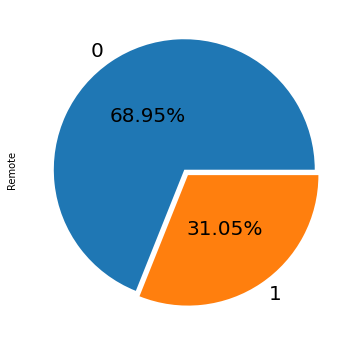

In [ ]:
separate = [0, 0.05]
pie = df['is_remote'].value_counts().plot.pie(
            explode=separate,
            autopct=(lambda p : '{:.2f}%'.format(p)),
            fontsize=20,label='Remote', pctdistance=0.5,
            figsize=(6, 6))